In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from pillar_project.data_utils.dataset import FunctionalDataset

pd.set_option('display.max_columns', 500)

In [2]:
data_dir = Path("/Users/dz/Documents/IGVF/pillar_project/data")
# data = pd.read_csv(data_dir / "pillar_data_clinvar38_19_annotated_final_v6_expanded.csv")
data = pd.read_csv(data_dir / "pillar_project_df_v2_with_prior.csv.tar",
                   compression='tar',
                   index_col=0)

/var/folders/3w/6nzf243d7dg77250tg19_4nr0000gn/T/ipykernel_46743/639656558.py:3: DtypeWarning: Columns (4,6,7,10,14,21,22,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_dir / "pillar_project_df_v2_with_prior.csv.tar",


In [3]:
dataset = FunctionalDataset(data[data.Dataset == "TSC2_tuberin_unpublished"],)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize(dataset):
    fig,ax = plt.subplots(1,1 + dataset.n_samples,figsize=((1 + dataset.n_samples)*5,5),sharey=True,sharex=True)
    for sampleNum,(sample_scores,sample_name) in enumerate(dataset.samples):
        sns.histplot(sample_scores,ax=ax[sampleNum],stat="density",label=f"{sample_name} n={len(sample_scores):,d}")
        ax[sampleNum].legend()
    sns.histplot(dataset.scores,ax=ax[-1],stat="density",label=f"all n={len(dataset.scores):,d}")
    ax[-1].legend()

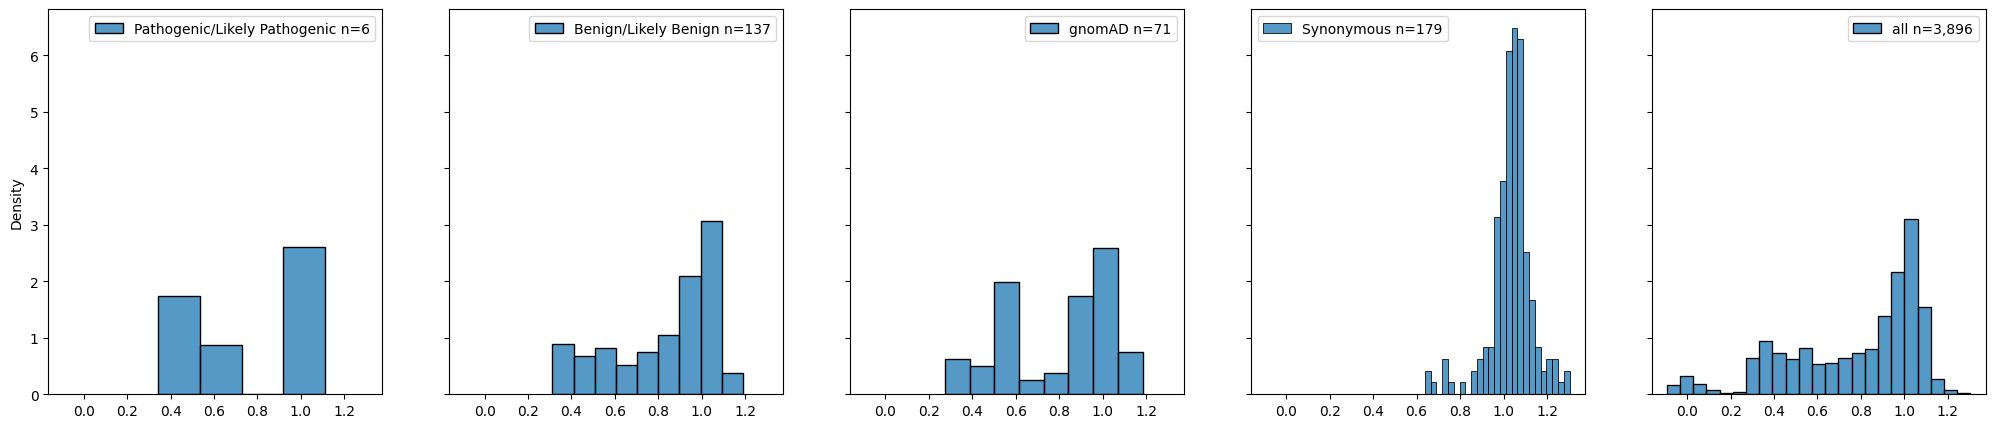

In [7]:
visualize(dataset)